In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head(5)

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


In [3]:
test_df = pd.read_csv('test.csv')
test_df.head(5)

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration
0,15.70,1,N,2,45.0,0.0,0.5,0.00,0.00,0.3,45.80,132,146,2018,10,20,5,16,3967.0
1,7.30,1,N,1,25.5,0.0,0.5,7.89,0.00,0.3,34.19,186,69,2018,2,24,5,15,1491.0
2,14.87,1,N,1,40.5,0.5,0.5,8.36,0.00,0.3,50.16,138,89,2018,9,11,1,22,1395.0
3,2.90,1,N,2,22.0,0.0,0.5,0.00,0.00,0.3,22.80,90,162,2018,6,7,3,11,1742.0
4,8.96,1,N,1,32.0,0.0,0.5,0.00,5.76,0.3,38.56,138,186,2018,4,20,4,10,1623.0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_distance            35000 non-null  float64
 1   rate_code                35000 non-null  int64  
 2   store_and_fwd_flag       35000 non-null  object 
 3   payment_type             35000 non-null  int64  
 4   fare_amount              35000 non-null  float64
 5   extra                    35000 non-null  float64
 6   mta_tax                  35000 non-null  float64
 7   tip_amount               35000 non-null  float64
 8   tolls_amount             35000 non-null  float64
 9   imp_surcharge            35000 non-null  float64
 10  total_amount             35000 non-null  float64
 11  pickup_location_id       35000 non-null  int64  
 12  dropoff_location_id      35000 non-null  int64  
 13  year                     35000 non-null  int64  
 14  month                 

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip_distance        15000 non-null  float64
 1   rate_code            15000 non-null  int64  
 2   store_and_fwd_flag   15000 non-null  object 
 3   payment_type         15000 non-null  int64  
 4   fare_amount          15000 non-null  float64
 5   extra                15000 non-null  float64
 6   mta_tax              15000 non-null  float64
 7   tip_amount           15000 non-null  float64
 8   tolls_amount         15000 non-null  float64
 9   imp_surcharge        15000 non-null  float64
 10  total_amount         15000 non-null  float64
 11  pickup_location_id   15000 non-null  int64  
 12  dropoff_location_id  15000 non-null  int64  
 13  year                 15000 non-null  int64  
 14  month                15000 non-null  int64  
 15  day                  15000 non-null 

In [6]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
trip_distance,35000.0,9.088815,4.496854,0.01,6.47,8.70,10.9900,79.01
rate_code,35000.0,1.110086,0.581456,1.00,1.00,1.00,1.0000,5.00
payment_type,35000.0,1.123400,0.350842,1.00,1.00,1.00,1.0000,4.00
fare_amount,35000.0,31.920911,14.689516,0.01,24.00,29.00,36.0000,400.00
extra,35000.0,0.320337,0.402590,0.00,0.00,0.00,0.5000,18.50
mta_tax,35000.0,0.486929,0.079781,0.00,0.50,0.50,0.5000,0.50
tip_amount,35000.0,6.142190,4.397599,0.00,4.46,6.05,8.1000,215.00
tolls_amount,35000.0,2.262871,3.578315,0.00,0.00,0.00,5.7600,189.50
imp_surcharge,35000.0,0.299940,0.004242,0.00,0.30,0.30,0.3000,0.30
total_amount,35000.0,41.442469,19.241543,0.31,30.35,38.47,48.3525,468.35


In [7]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
trip_distance,15000.0,9.103765,4.480066,0.01,6.50,8.730,10.9400,69.94
rate_code,15000.0,1.100133,0.550751,1.00,1.00,1.000,1.0000,5.00
payment_type,15000.0,1.124467,0.348209,1.00,1.00,1.000,1.0000,4.00
fare_amount,15000.0,31.839195,14.499355,0.01,24.00,29.000,36.0000,300.00
extra,15000.0,0.322007,0.419592,0.00,0.00,0.000,0.5000,18.00
mta_tax,15000.0,0.487033,0.079471,0.00,0.50,0.500,0.5000,0.50
tip_amount,15000.0,6.150660,4.525842,0.00,4.46,6.055,8.0600,125.00
tolls_amount,15000.0,2.250380,3.440184,0.00,0.00,0.000,5.7600,33.80
imp_surcharge,15000.0,0.299920,0.004898,0.00,0.30,0.300,0.3000,0.30
total_amount,15000.0,41.359166,19.210809,0.31,30.35,38.410,48.0925,389.12


In [8]:
train_df.isnull().sum()

trip_distance              0
rate_code                  0
store_and_fwd_flag         0
payment_type               0
fare_amount                0
extra                      0
mta_tax                    0
tip_amount                 0
tolls_amount               0
imp_surcharge              0
total_amount               0
pickup_location_id         0
dropoff_location_id        0
year                       0
month                      0
day                        0
day_of_week                0
hour_of_day                0
trip_duration              0
calculated_total_amount    0
dtype: int64

In [9]:
test_df.isnull().sum()

trip_distance          0
rate_code              0
store_and_fwd_flag     0
payment_type           0
fare_amount            0
extra                  0
mta_tax                0
tip_amount             0
tolls_amount           0
imp_surcharge          0
total_amount           0
pickup_location_id     0
dropoff_location_id    0
year                   0
month                  0
day                    0
day_of_week            0
hour_of_day            0
trip_duration          0
dtype: int64

## EDA

<Figure size 2000x1000 with 0 Axes>

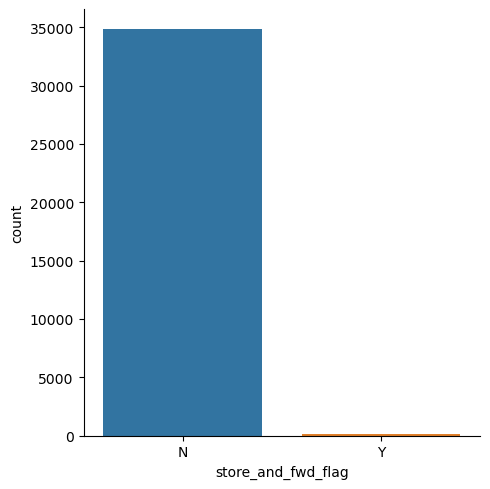

In [10]:
plt.figure(figsize=(20,10))
sns.catplot(data=train_df,x='store_and_fwd_flag',kind='count')

In [11]:
float_cols = []

for col in train_df.columns:
    if train_df[col].dtype == 'float64':
        float_cols.append(col)

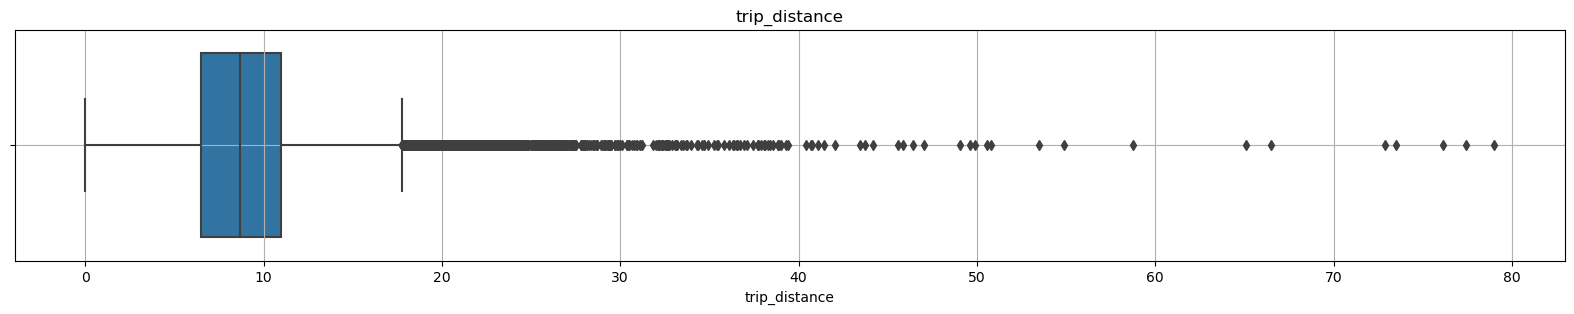

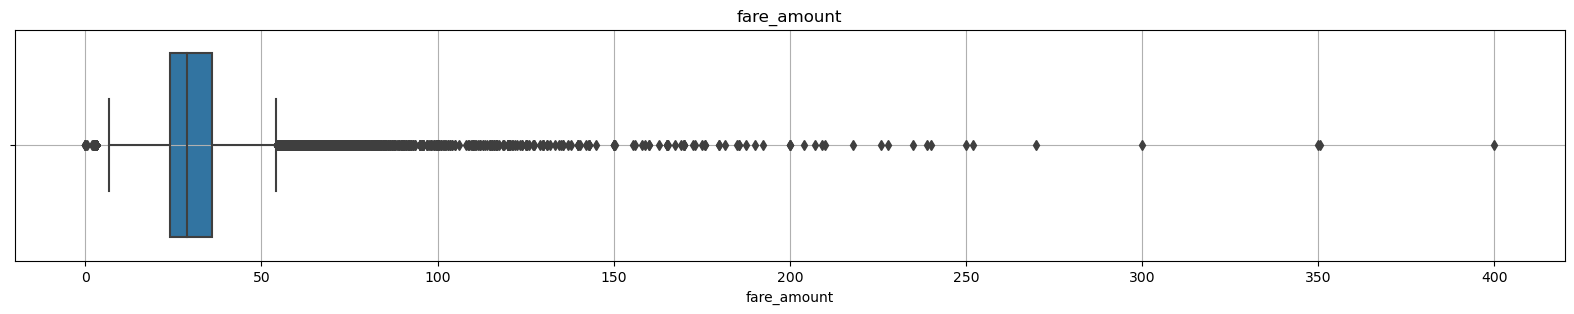

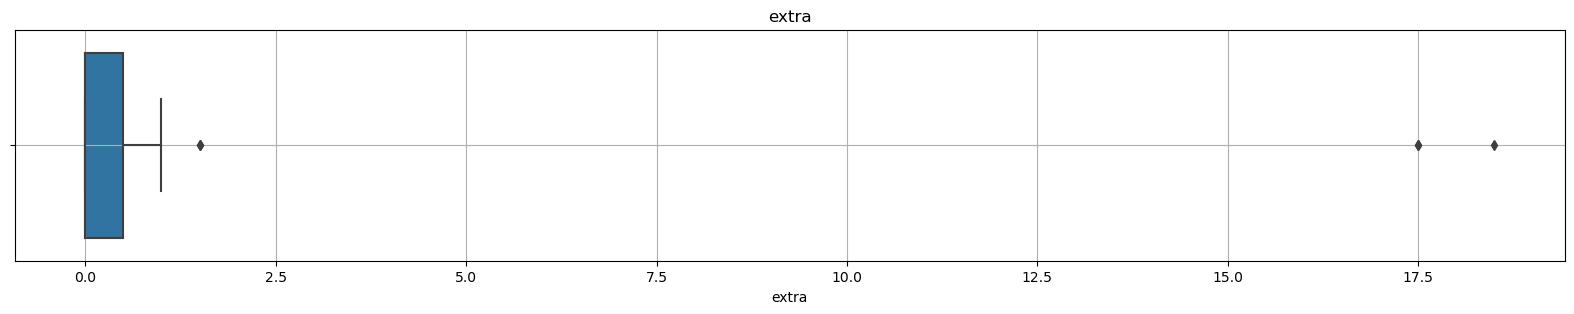

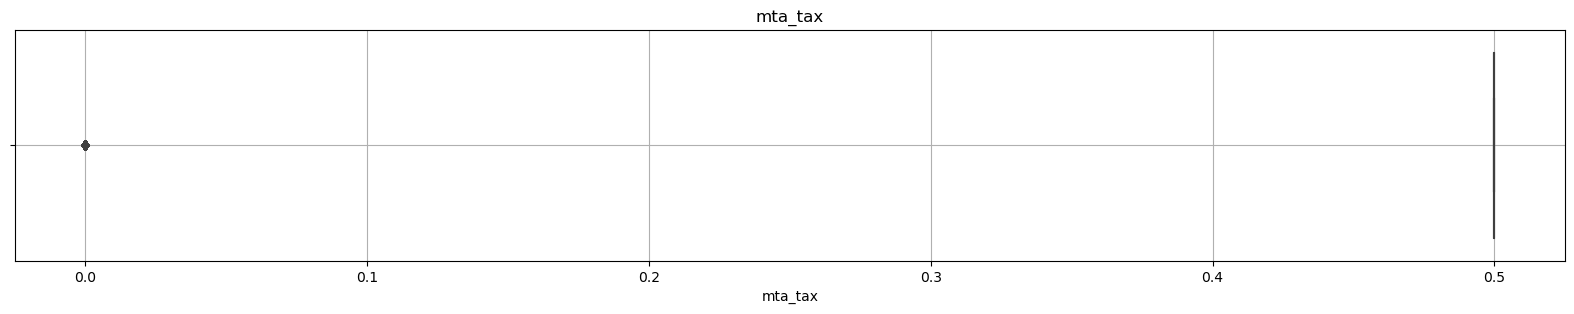

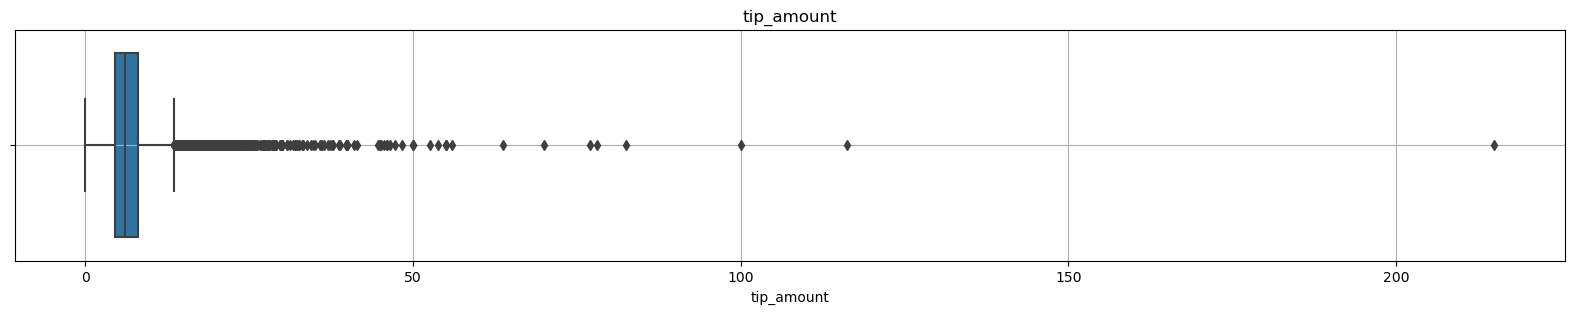

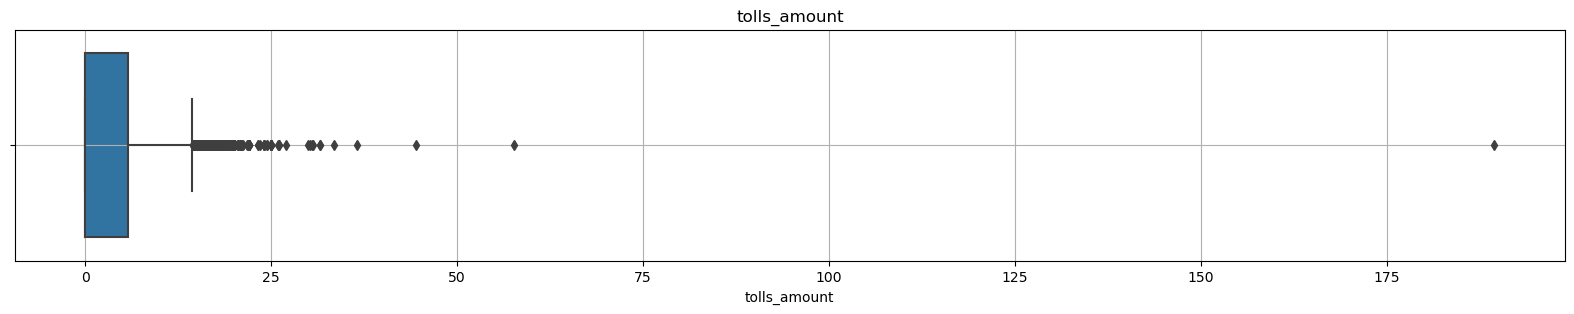

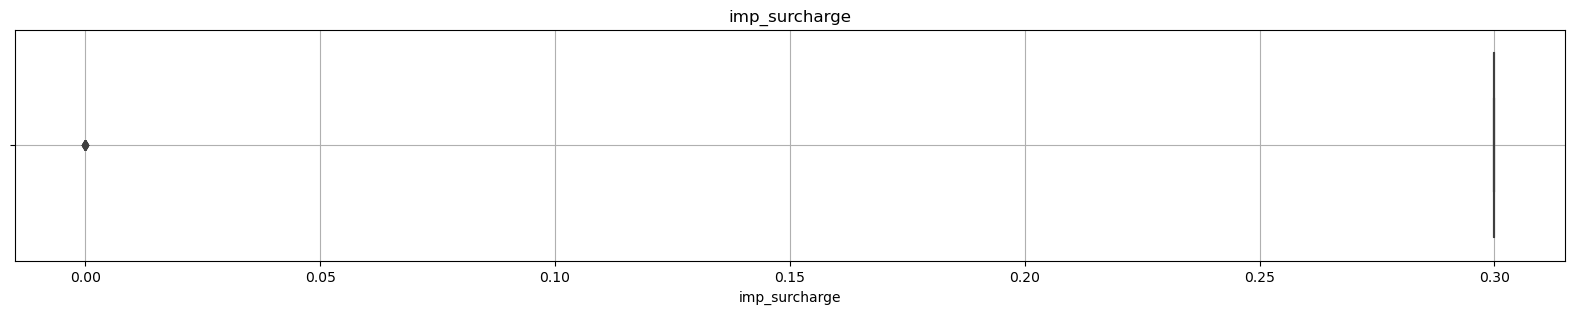

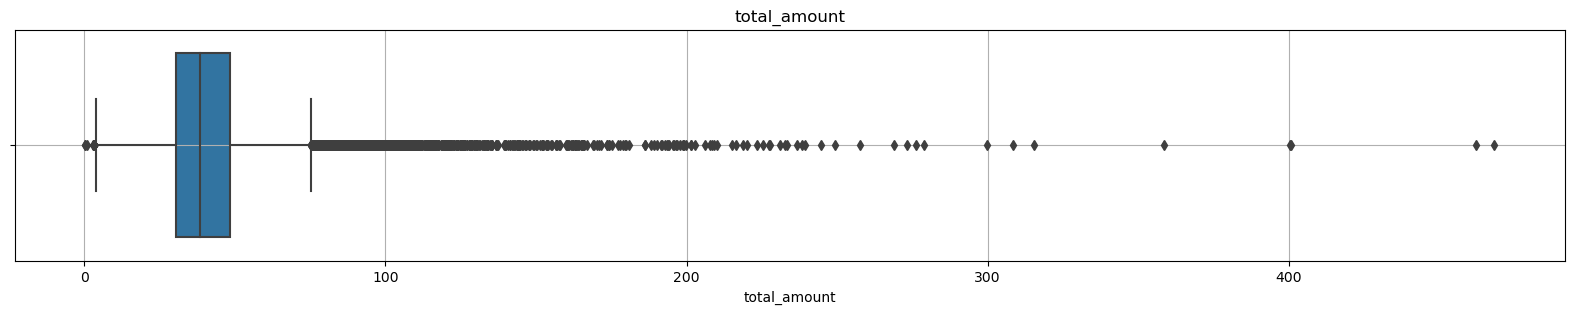

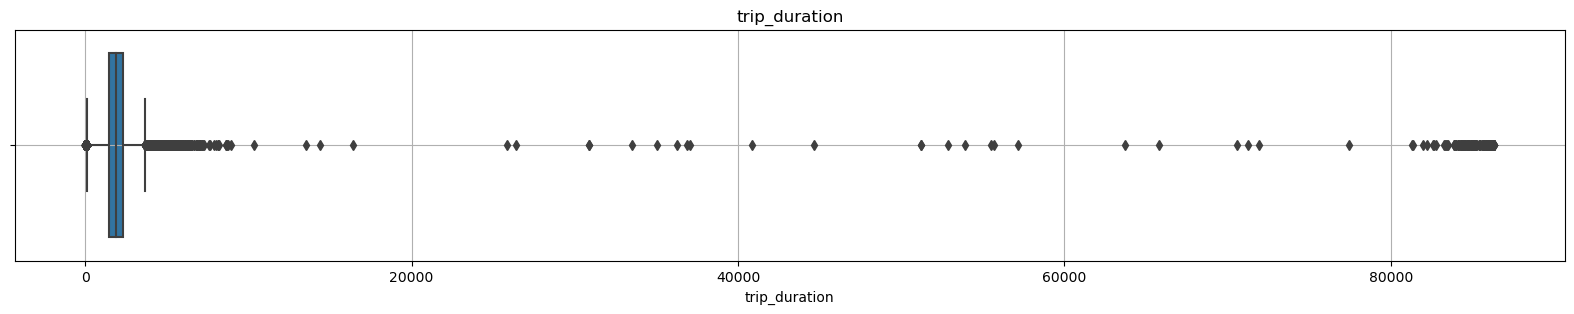

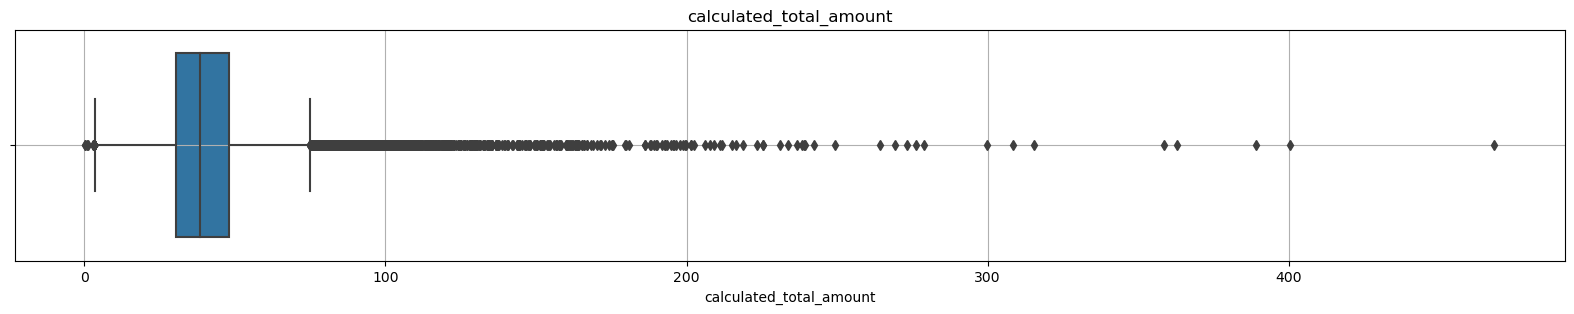

In [12]:
for col in float_cols:
    plt.figure(figsize=(20,3))
    sns.boxplot(data=train_df,x=col)
    plt.title(col)
    plt.grid()

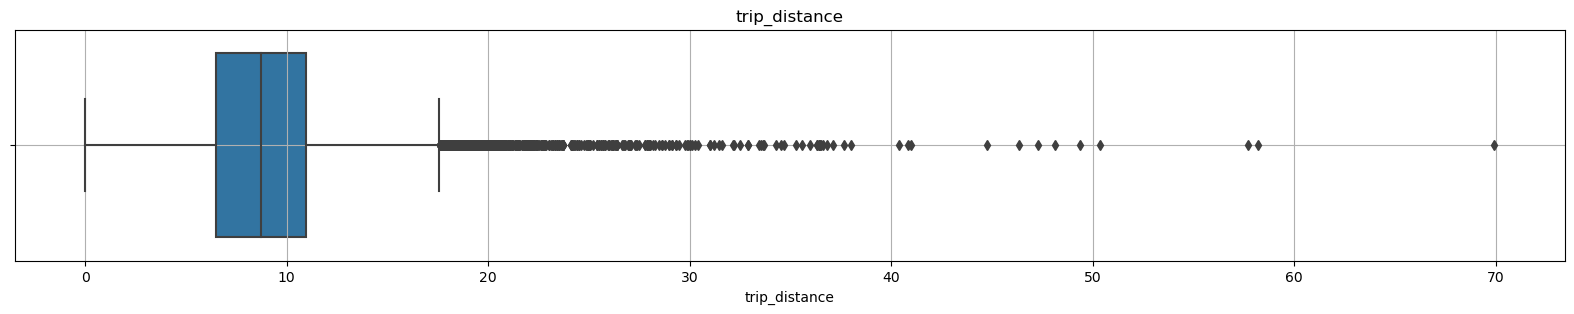

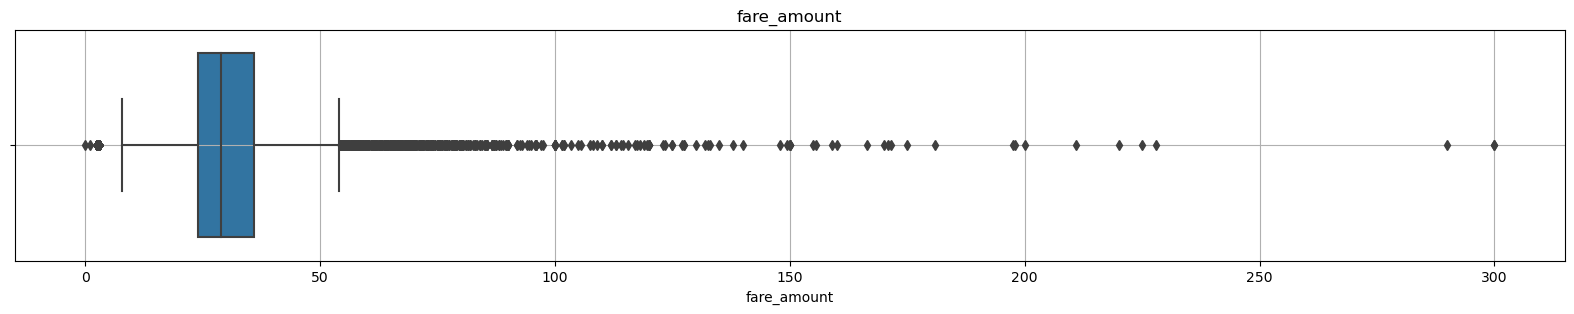

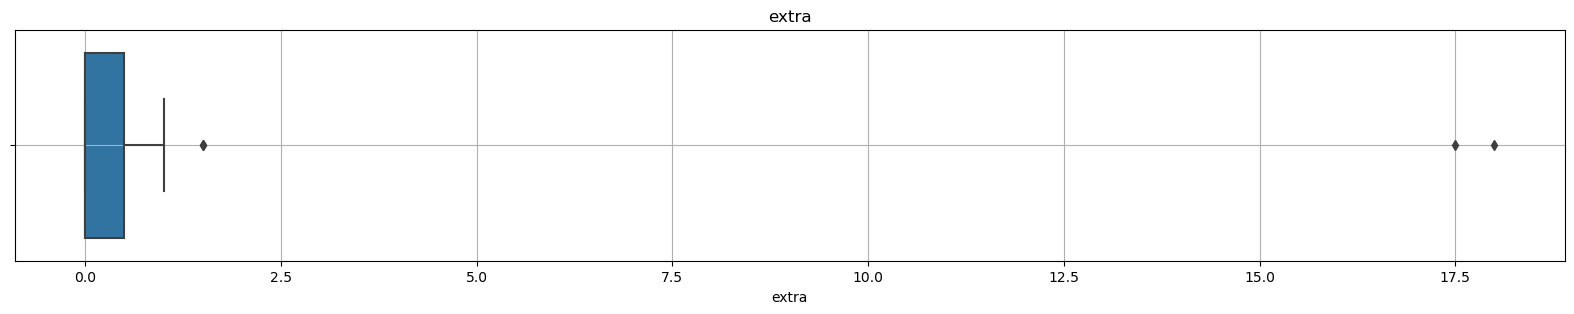

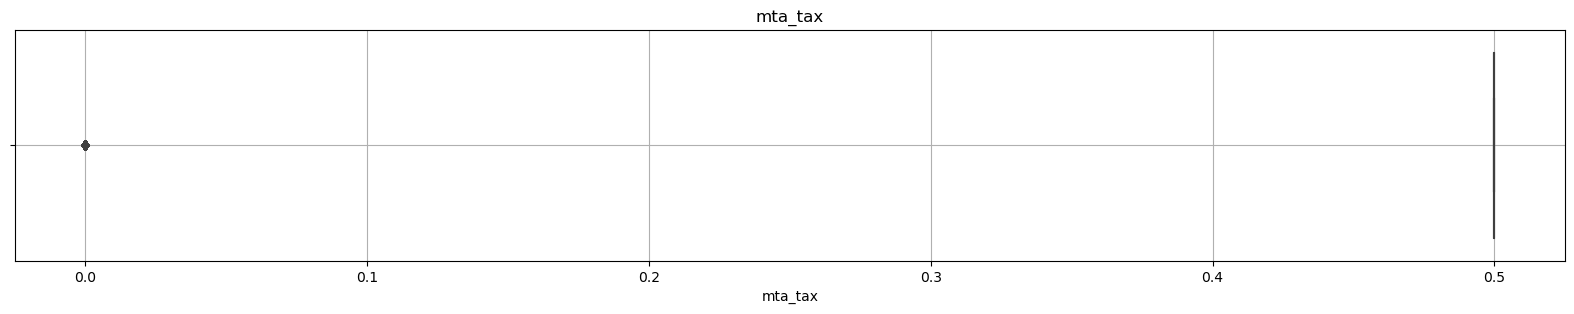

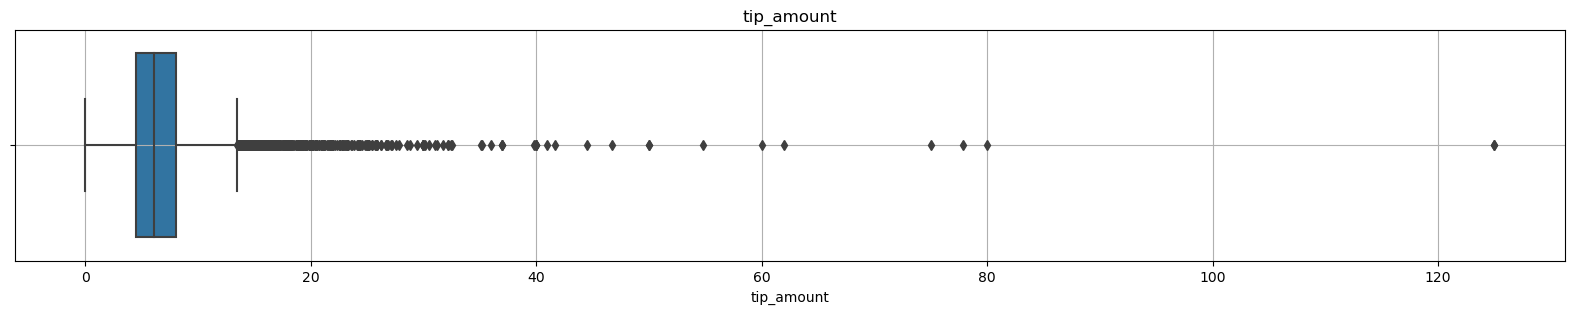

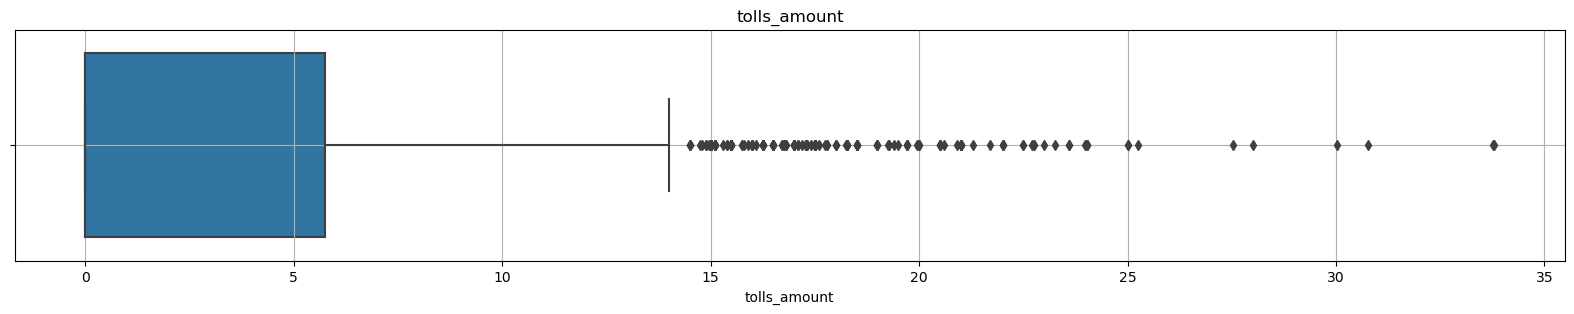

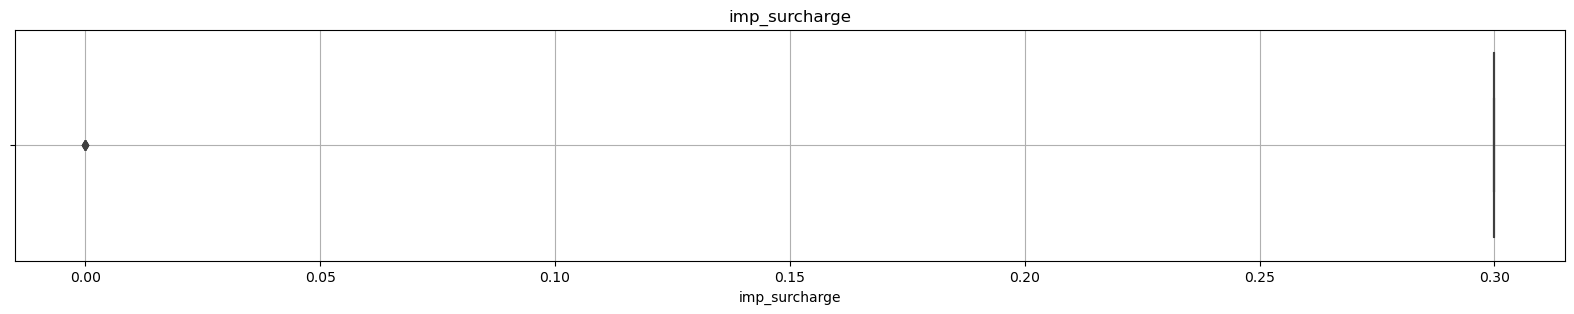

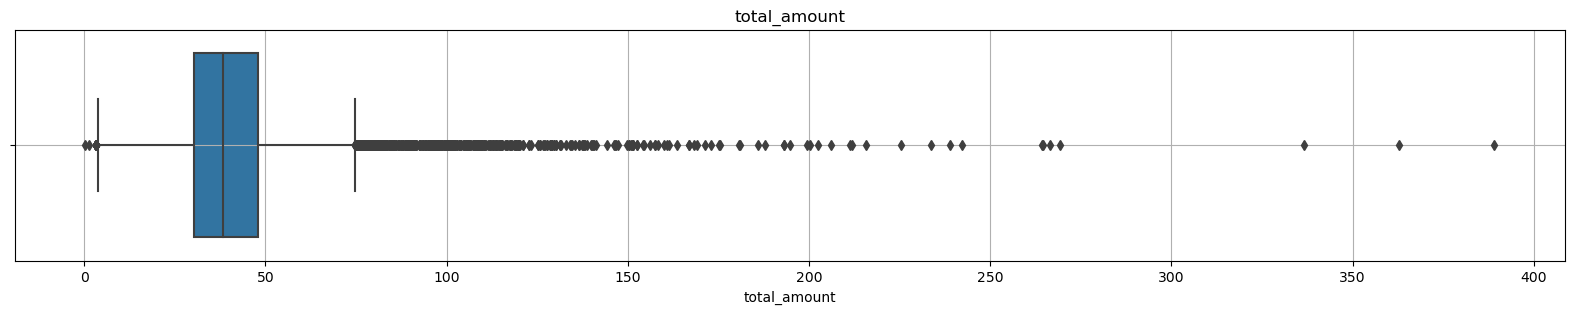

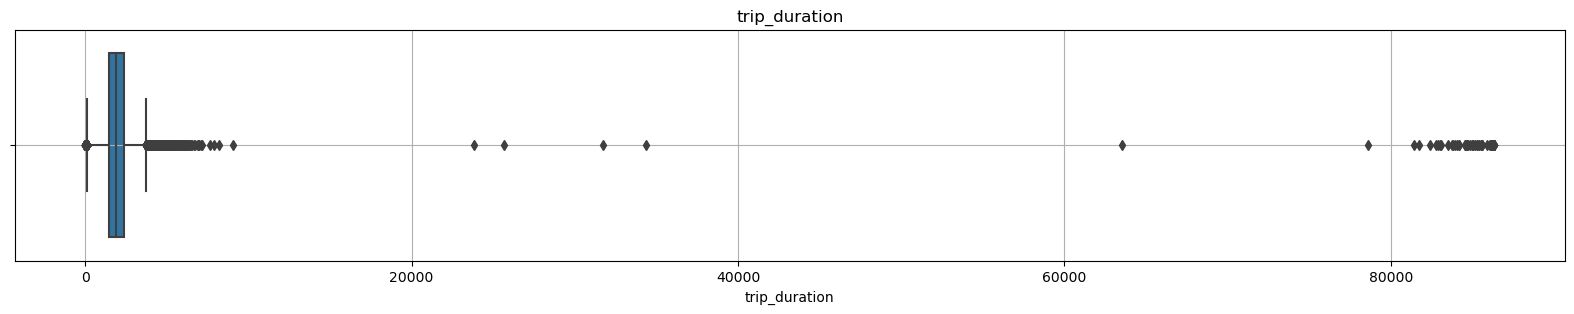

In [13]:
for col in float_cols[0:-1]:
    plt.figure(figsize=(20,3))
    sns.boxplot(data=test_df,x=col)
    plt.title(col)
    plt.grid()

the distribution appears to be very similar in both training and data sets for these categories

In [14]:
int_cols = []

for col in train_df.columns:
    if train_df[col].dtype == 'int64':
        int_cols.append(col)

In [15]:
int_cols

['rate_code',
 'payment_type',
 'pickup_location_id',
 'dropoff_location_id',
 'year',
 'month',
 'day',
 'day_of_week',
 'hour_of_day']

<Figure size 2000x1000 with 0 Axes>

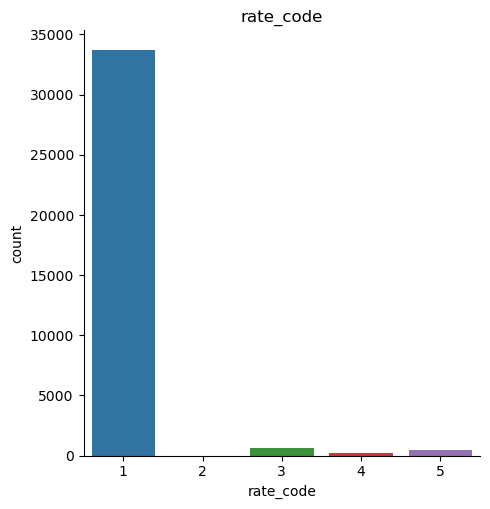

<Figure size 2000x1000 with 0 Axes>

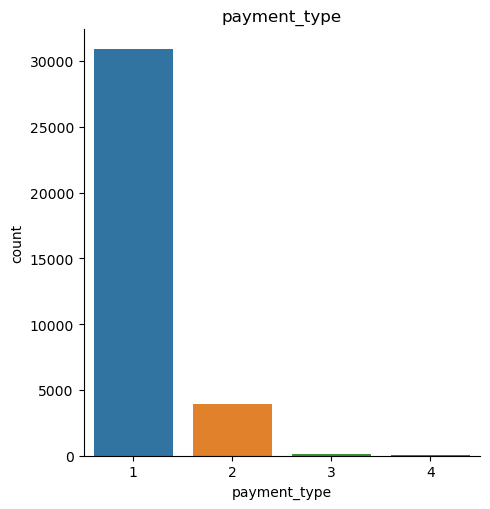

In [16]:
for col in int_cols[0:2]:
    plt.figure(figsize=(20,10))
    sns.catplot(data=train_df,x=col,kind='count')
    plt.title(col)

<Figure size 2000x1000 with 0 Axes>

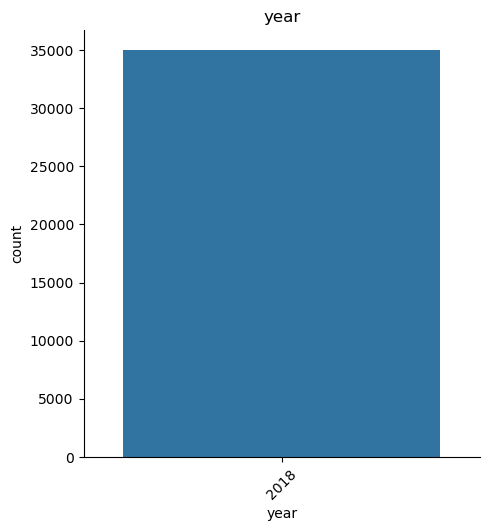

<Figure size 2000x1000 with 0 Axes>

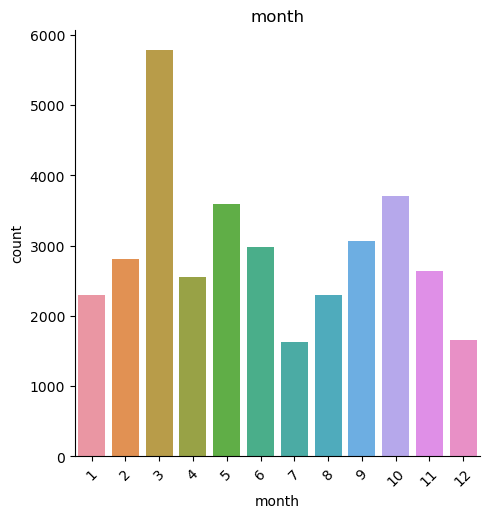

<Figure size 2000x1000 with 0 Axes>

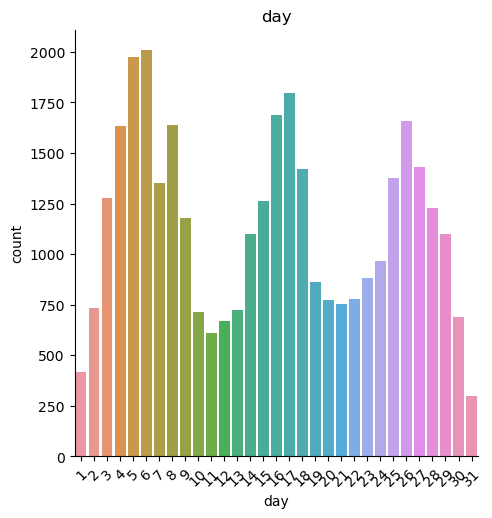

<Figure size 2000x1000 with 0 Axes>

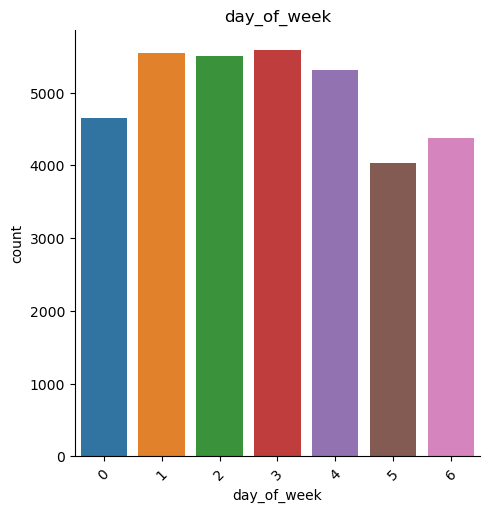

<Figure size 2000x1000 with 0 Axes>

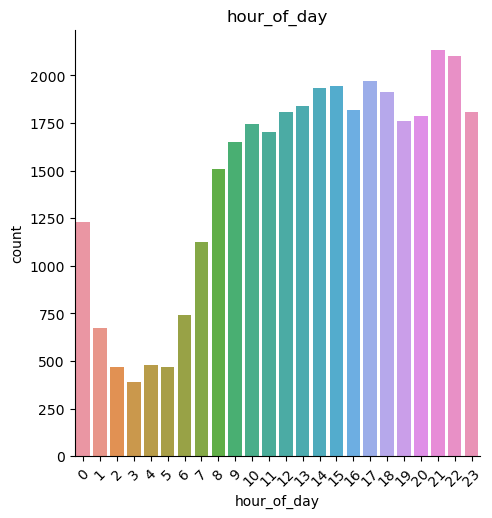

In [17]:
for col in int_cols[4:]:
    plt.figure(figsize=(20,10))
    sns.catplot(data=train_df,x=col,kind='count')
    plt.title(col)
    plt.xticks(rotation=45)

<Figure size 2000x1000 with 0 Axes>

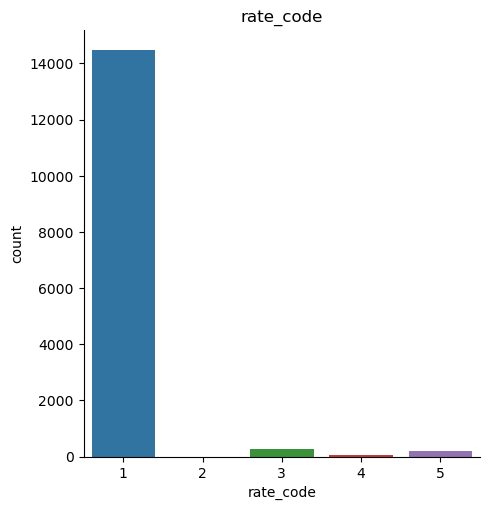

<Figure size 2000x1000 with 0 Axes>

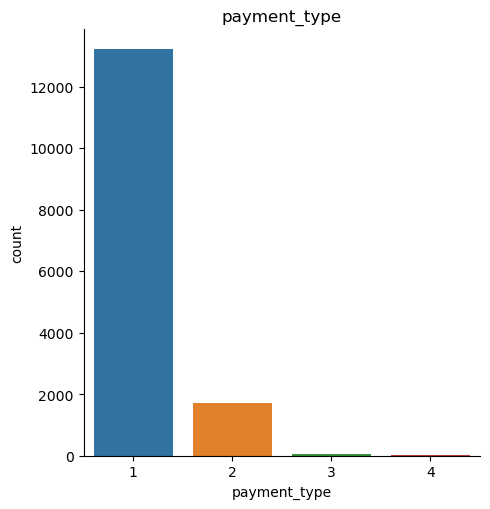

In [18]:
for col in int_cols[0:2]:
    plt.figure(figsize=(20,10))
    sns.catplot(data=test_df,x=col,kind='count')
    plt.title(col)

<Figure size 2000x1000 with 0 Axes>

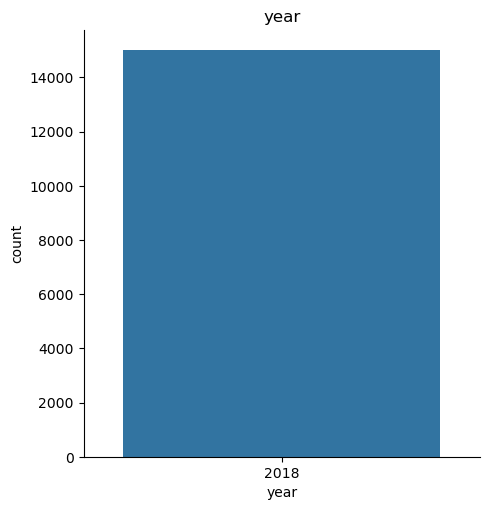

<Figure size 2000x1000 with 0 Axes>

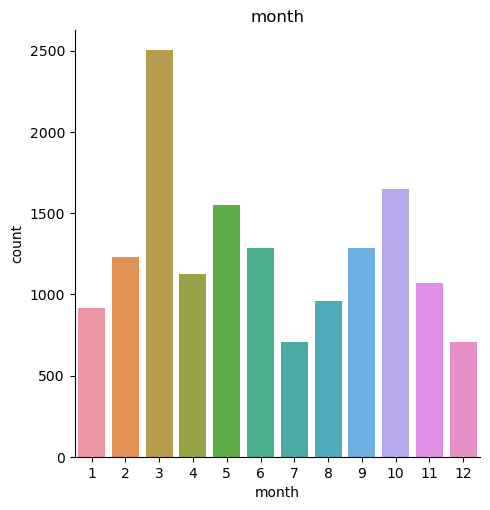

<Figure size 2000x1000 with 0 Axes>

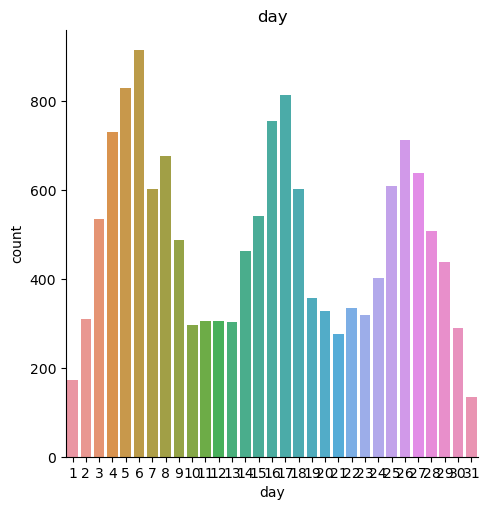

<Figure size 2000x1000 with 0 Axes>

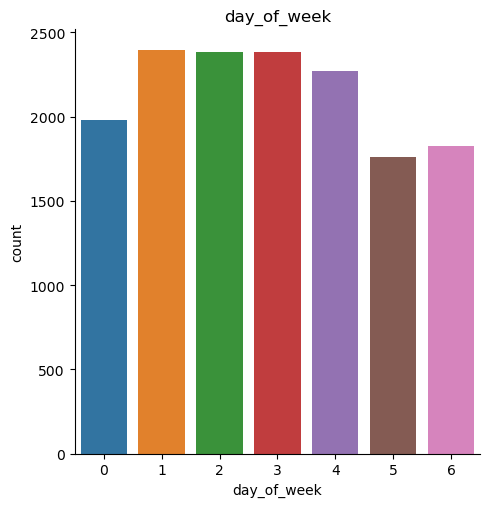

<Figure size 2000x1000 with 0 Axes>

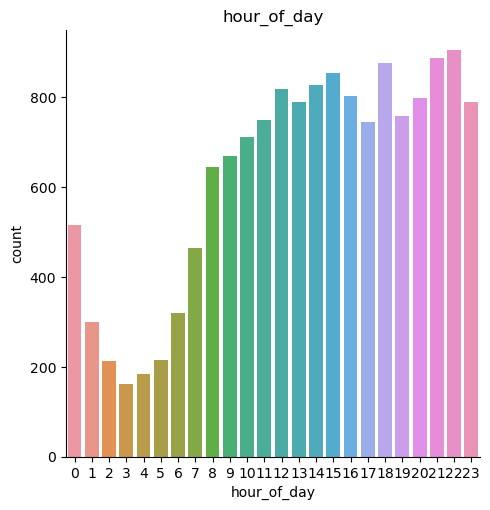

In [19]:
for col in int_cols[4:]:
    plt.figure(figsize=(20,10))
    sns.catplot(data=test_df,x=col,kind='count')
    plt.title(col)

we can also observe virtually the same kind of distribution.

In [20]:
train_df['route_id'] = train_df['pickup_location_id'].apply(str) + '-' + train_df['dropoff_location_id'].apply(str)
test_df['route_id'] = test_df['pickup_location_id'].apply(str) + '-' + test_df['dropoff_location_id'].apply(str)

In [21]:
train_df.head(3)

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,...,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,route_id
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,...,262,138,2018,3,7,2,6,2131.0,24.30,262-138
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,...,263,236,2018,2,25,6,10,2377.0,37.40,263-236
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,...,138,230,2018,1,29,0,8,1286.0,30.36,138-230


In [25]:
most_common_routes = train_df.groupby('route_id').count()['trip_distance'].sort_values(ascending=False)
most_common_routes.head(10)

route_id
138-230    593
138-162    480
138-161    447
264-264    399
230-138    388
161-138    323
138-164    304
138-170    303
162-138    287
138-163    278
Name: trip_distance, dtype: int64